# Navigation

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [2]:
!pip -q install ./python

tensorflow 1.7.1 has requirement numpy>=1.13.3, but you'll have numpy 1.12.1 which is incompatible.
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 2.0.10 which is incompatible.


In [3]:
from unityagents import UnityEnvironment
import numpy as np
import os
from dqn_agent import Agent
from matplotlib import pyplot as plt
import torch

from collections import namedtuple, deque

In [4]:
##Instantiate Environment
env = UnityEnvironment(file_name="/data/Banana_Linux_NoVis/Banana.x86_64")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [5]:
##Get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

env_info = env.reset(train_mode=True)[brain_name]

In [6]:
##Environment attributes
action_size = brain.vector_action_space_size
state_size = len(env_info.vector_observations[0])

In [7]:
##Instantiate Agent
agent = Agent(state_size=state_size, 
              action_size=action_size, 
              seed=42)

In [8]:
##Variables
def dqn(n_episodes=2000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    
    scores = []
    scores_window = deque(maxlen=100)
    eps = eps_start
    
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name] # reset the environment
        state = env_info.vector_observations[0]   
        score = 0
        #print('===================')
        #print(i_episode)
        
        for t in range(max_t):
            #print(t)
            ##Determine next action
            action = agent.act(state, eps)
            
            ##Execute Action
            env_info = env.step(action)[brain_name]  
            
            ##Get Next State after Action
            next_state = env_info.vector_observations[0]
            
            ##Get reward and done status from environment
            reward = env_info.rewards[0]                  
            done = env_info.local_done[0]  
            
            ##Update Agent
            agent.step(state, action, reward, next_state, done)
            
            ##Update Scores and state
            score += reward  
            state = next_state  
            
            ##End episode if done
            if done:
                break
            
        scores_window.append(score)
        scores.append(score)
        
        ##Update epsilon
        eps = max(eps_end, eps_decay*eps)
        
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
            
        ##Break if acheive the desired level of performance
        if np.mean(scores_window)>=13.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth')
            break
        
    return scores

In [9]:
##run Agent
scores = dqn(n_episodes=2000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995)

Episode 100	Average Score: 0.75
Episode 200	Average Score: 4.42
Episode 300	Average Score: 6.66
Episode 400	Average Score: 9.70
Episode 498	Average Score: 13.02
Environment solved in 398 episodes!	Average Score: 13.02


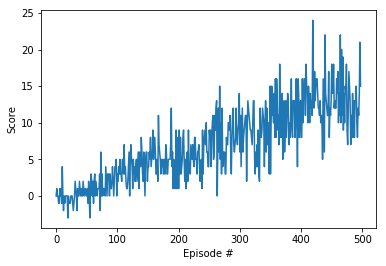

In [10]:
##Plot training performance
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()